In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import researchpy as rp

In [4]:
df=pd.read_csv('police.csv')

In [5]:
df.shape

(91741, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [7]:
df.drop(['county_name'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   driver_gender       86406 non-null  object 
 3   driver_age_raw      86414 non-null  float64
 4   driver_age          86120 non-null  float64
 5   driver_race         86408 non-null  object 
 6   violation_raw       86408 non-null  object 
 7   violation           86408 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3196 non-null   object 
 10  stop_outcome        86408 non-null  object 
 11  is_arrested         86408 non-null  object 
 12  stop_duration       86408 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(2), object(10)
memory usage: 8.6+ MB


In [9]:
pd.isnull(df).sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [10]:
df.drop(['search_type'],axis=1,inplace=True)

In [11]:
df.shape

(91741, 13)

In [12]:
df.dropna(inplace=True)

In [13]:
pd.isnull(df).sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [14]:
df.shape

(86113, 13)

<Axes: xlabel='driver_gender', ylabel='is_arrested'>

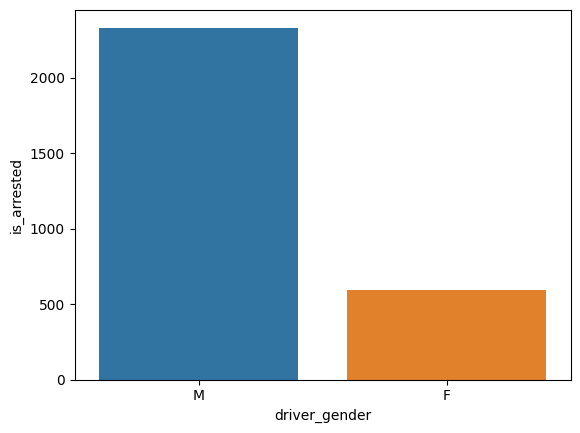

In [15]:
#Arrests made for each gender
dv = df.groupby(['driver_gender'], as_index=False)['is_arrested'].sum().sort_values(by='is_arrested', ascending=False)
sns.barplot(x='driver_gender', y = 'is_arrested', data = dv)

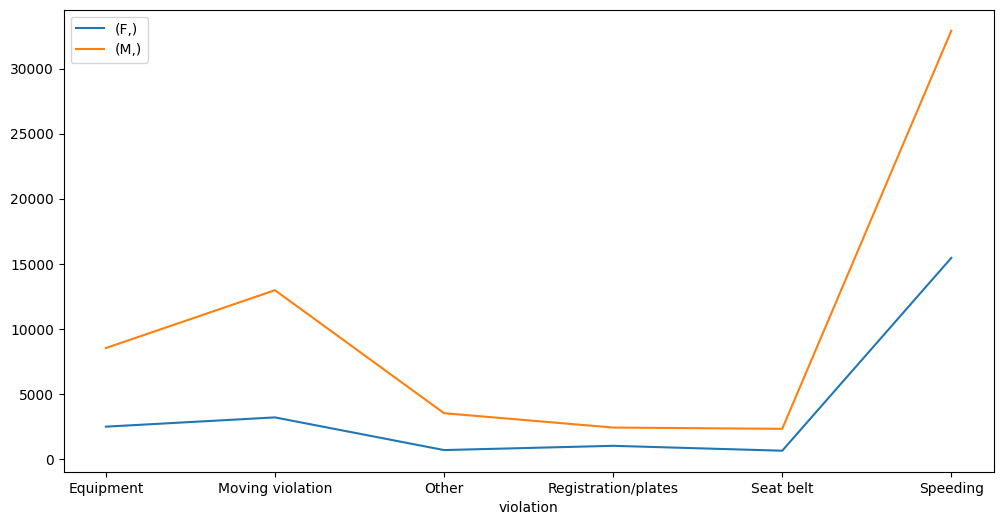

In [84]:
#violations done by each gender
grouped = df.groupby(['driver_gender', 'violation']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(12,6))
for key, group in grouped.groupby(['driver_gender']):
    group.plot('violation', 'count', ax=ax, label=key)

ax.legend()
plt.show()

Text(0.5, 1.0, 'Violations which caused arrests')

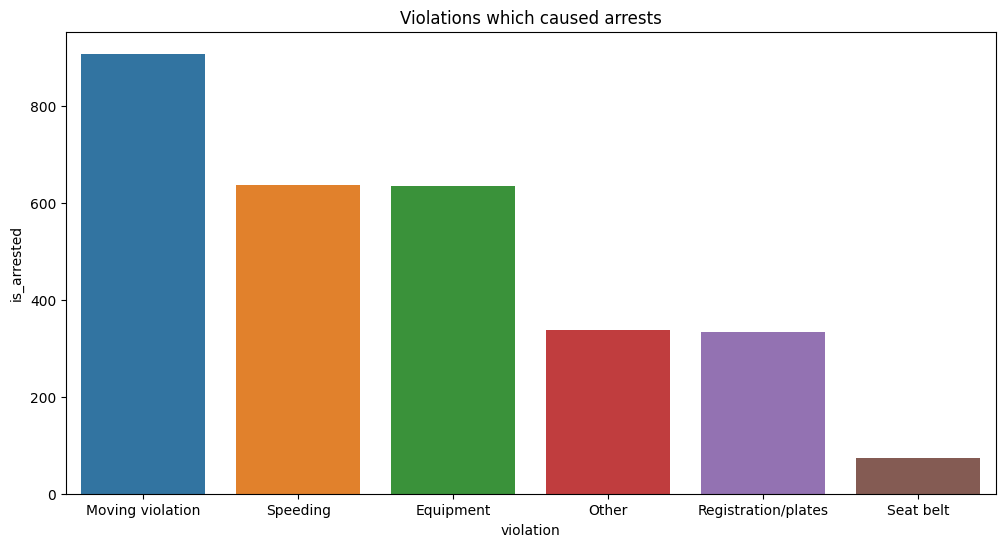

In [17]:
# Violations which caused arrests
vi = df.groupby(['violation'], as_index=False)['is_arrested'].sum().sort_values(by='is_arrested', ascending=False)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='violation', y='is_arrested', data = vi, ax=ax)
plt.title('Violations which caused arrests')


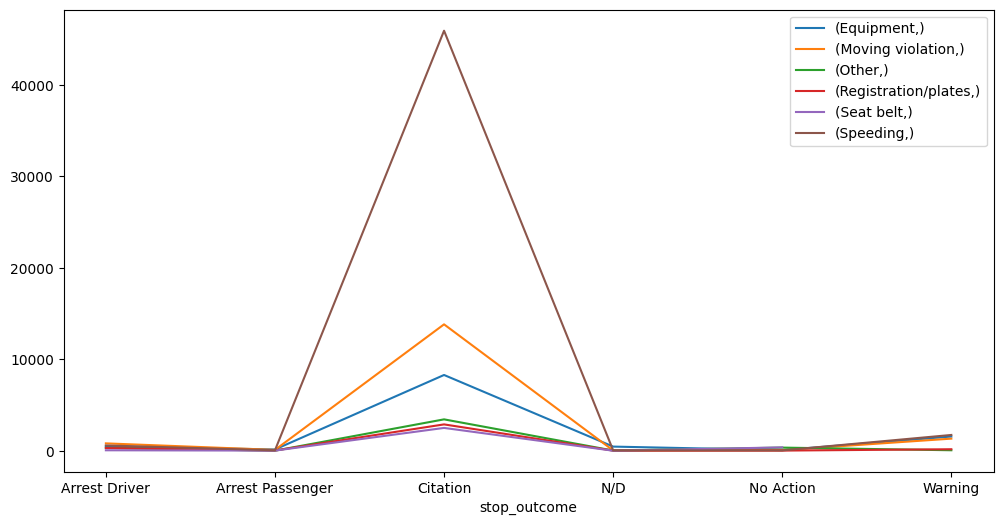

In [31]:
#Highest no of Actions taken for each violation
grouped = df.groupby(['stop_outcome', 'violation', 'is_arrested']).size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(12,6))
for key, group in grouped.groupby(['violation']):
    group.plot('stop_outcome', 'count', ax=ax, label=key)

ax.legend()
plt.show()

<Axes: xlabel='violation', ylabel='is_arrested'>

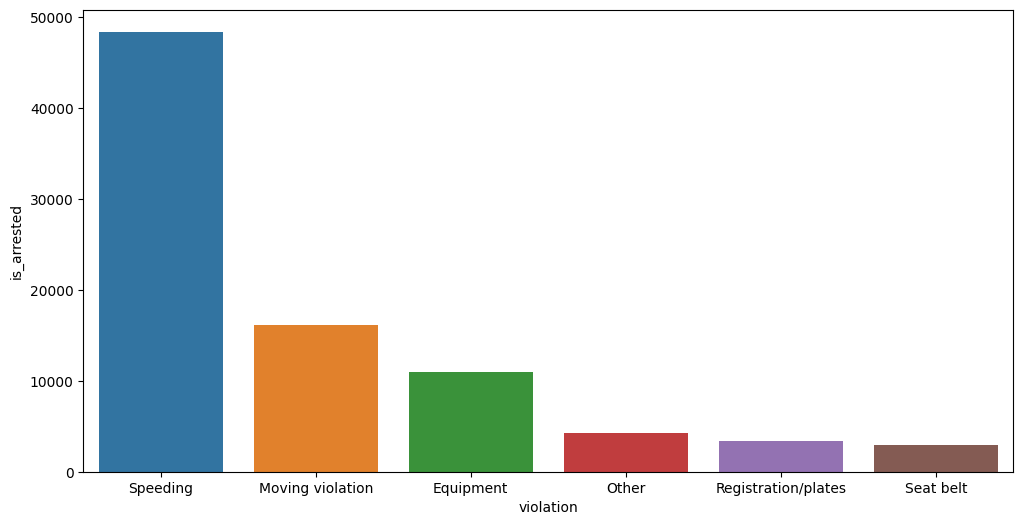

In [76]:
#Highest number of arrests made per violations
dv = df.groupby(['violation'],as_index=False)['is_arrested'].count().sort_values(by='is_arrested', ascending=False)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='violation',y='is_arrested',data = dv, ax= ax)

<Axes: xlabel='stop_time', ylabel='violation'>

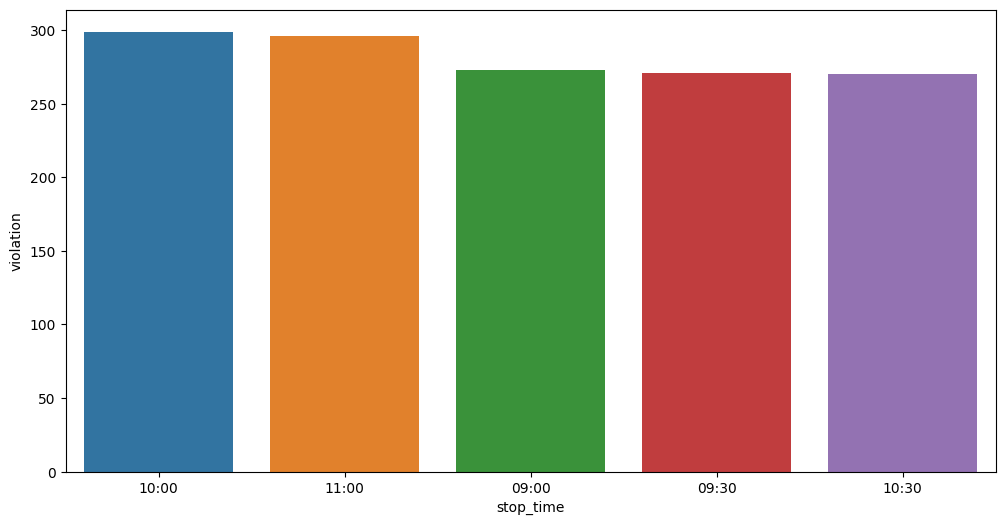

In [20]:
#Time stamp durig which the highest amount of violations are made
sv = df.groupby(['stop_time'], as_index=False)['violation'].count().sort_values(by='violation', ascending=False).head(5)
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='stop_time', y ='violation', data = sv)

<Axes: xlabel='driver_race', ylabel='violation'>

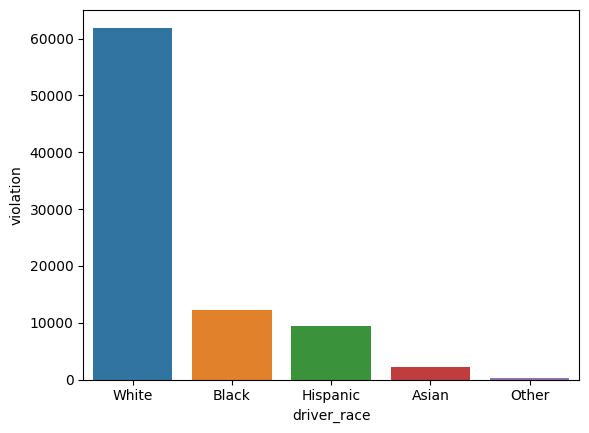

In [21]:
#race of people who commited highest number of violations
dv = df.groupby(['driver_race'], as_index=False)['violation'].count().sort_values(by='violation', ascending=False).head(5)
sns.barplot(x='driver_race', y ='violation', data = dv )

In [22]:
df['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [23]:
df['stop_duration'].replace('2', None, inplace=True)

In [24]:
df['stop_duration'].unique()

array(['0-15 Min', '16-30 Min', '30+ Min', None, '1'], dtype=object)

In [77]:
df['stop_duration'].replace('1', None, inplace=True)

<Axes: xlabel='stop_duration', ylabel='is_arrested'>

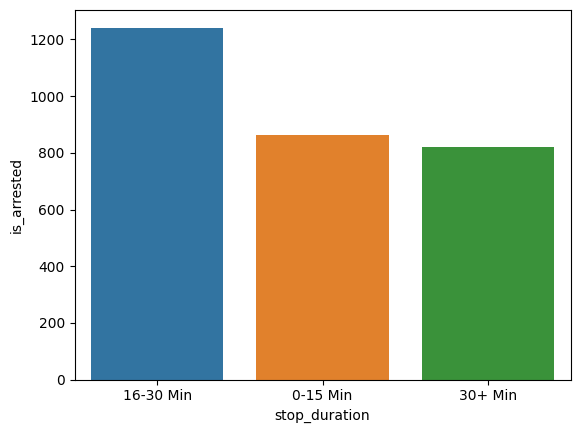

In [78]:
#Time Duration which might lead to an arrest, suppose if a person is stopped for time duration between
#16-30 min, then there is a probability of a person getting arrested.
dv = df.groupby(['stop_duration'], as_index=False)['is_arrested'].sum().sort_values(by='is_arrested', ascending = False)
sns.barplot(x='stop_duration',y ='is_arrested', data = dv)

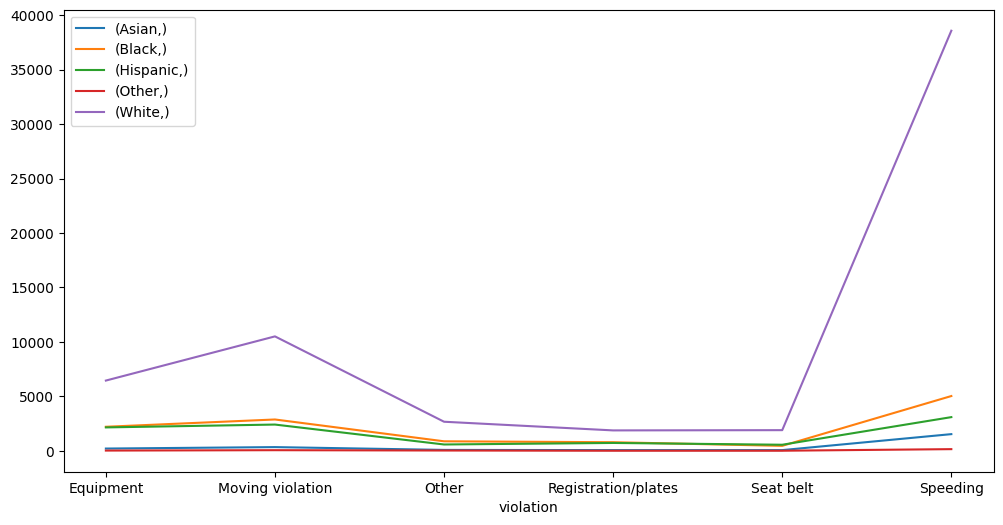

In [26]:
#Highest Number of crimes commited by each race
grouped = df.groupby(['driver_race', 'violation']).size().reset_index(name='count')

# plot the grouped data
fig, ax = plt.subplots(figsize=(12,6))
for key, group in grouped.groupby(['driver_race']):
    group.plot('violation', 'count', ax=ax, label=key)

ax.legend()
plt.show()

<Axes: xlabel='driver_age', ylabel='violation'>

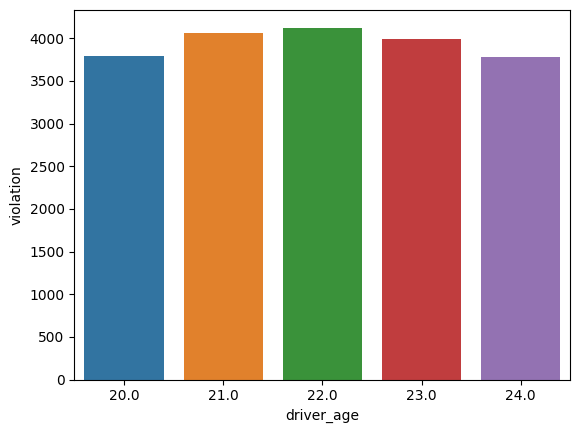

In [72]:
#Age's commiting the highest number of violations
dv = df.groupby(['driver_age'],as_index=False)['violation'].count().sort_values(by='violation',ascending=False).head(5)
sns.barplot(x='driver_age',y='violation',data=dv)